In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree,datasets
from sklearn.model_selection import train_test_split

In [2]:
wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [4]:
#max_depth 决策树的深度
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
clf.score(X_test,y_test)

0.8222222222222222

In [17]:
cmap_light = ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000","#00FF00","#0000FF"])

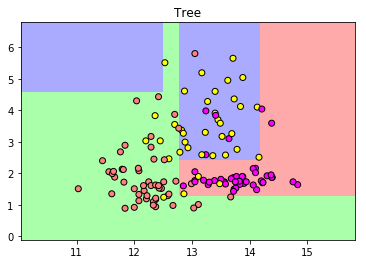

In [18]:
x_min,x_max = X_train[:,0].min()-1,X_train[:,0].max()+1
y_min,y_max = X_train[:,1].min()-1,X_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.spring,edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Tree")
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
wine = datasets.load_wine()

In [20]:
X = wine.data[:,:2]
y = wine.target

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
#指定6棵树
forest = RandomForestClassifier(n_estimators=6,random_state=3)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [24]:
forest.score(X_train,y_train),forest.score(X_test,y_test)

(0.9398496240601504, 0.7333333333333333)

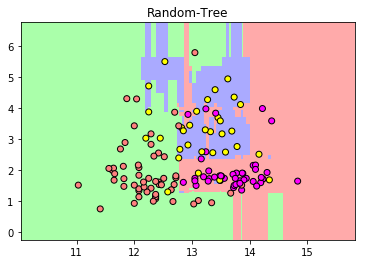

In [27]:
x_min,x_max = X_train[:,0].min()-1,X_train[:,0].max()+1
y_min,y_max = X_train[:,1].min()-1,X_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
z = forest.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.spring,edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Random-Tree")
plt.show()

### 总结

- 随机森林集成了决策树的所有优点
- 超大数据集使用多进程并行处理
- 超高维、稀疏数据集吃力，消耗内存